<a href="https://colab.research.google.com/github/dhguslee/leedo/blob/main/Machine%20Learning%20Code/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree
---

### I. Library

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### II. Dataset Preparation

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target

print("shape : ", df.shape, "\n", "data : ", df.head())

# x = df.loc[ : , df.columns != "target"]
# y = df["target"]
# print("x : ", x.shape, "y : ", y.shape)

shape :  (569, 31) 
 data :     mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]


### III. Train dataset and Test dataset

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.3,
                                                    stratify = cancer.target,   # train set과 test set의 class비율 동일
                                                    shuffle = True,
                                                    random_state = 1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

### IV. Model training

In [ ]:
### 모든 리프 노드 사용
DT = DecisionTreeClassifier(random_state = 11)

DT.fit(x_train, y_train)


### 트리 깊이 제한
DTL = DecisionTreeClassifier(max_depth = 4, random_state = 22)

DTL.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

### V. Prediction

In [ ]:
DT.predict(x_test)

DTL.predict(x_test)

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

### VI. Score (Accuracy)

In [ ]:
DT_train_socre = DT.score(x_train, y_train)
DT_test_socre = DT.score(x_test, y_test)

DTL_train_socre = DTL.score(x_train, y_train)
DTL_test_socre = DTL.score(x_test, y_test)


print("DT", "\n", "Train Score : ", np.round(DT_train_socre, 3), 
      "\n", "Test Score", np.round(DT_test_socre, 3))
print("DTL", "\n", "Train Score : ", np.round(DTL_train_socre, 3), 
      "\n", "Test Score", np.round(DTL_test_socre, 3))

DT 
 Train Score :  1.0 
 Test Score 0.947
DTL 
 Train Score :  0.985 
 Test Score 0.942


### VII-1. Visualization DT (by export_graphviz)

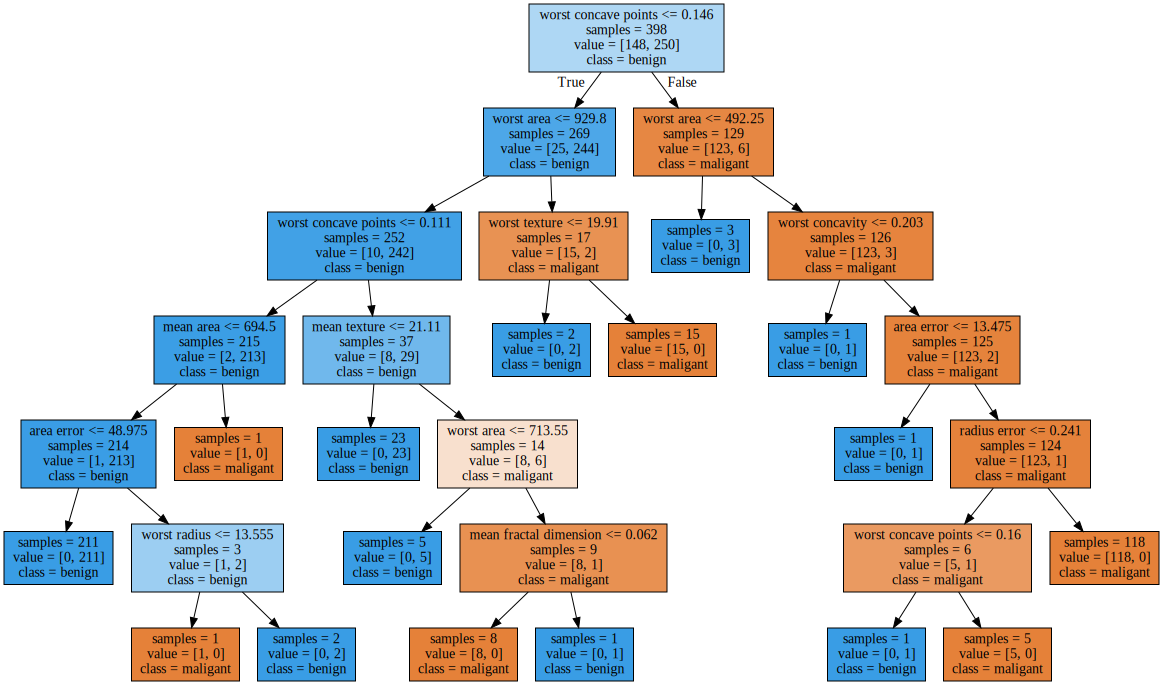

In [ ]:
# export_graphviz() = 그래프 저장용 텍스트 파일 포맷인 .dot 파일 포맷 생성

export_graphviz(DT,      # Decision Tree model
                out_file = "decisionTree1.dot",         # 파일 저장 유무
                class_names = ["maligant", "benign"],   # class 변수의 값 이름 설정 / 이진분류에서 2개뿐
                feature_names = cancer.feature_names,   # columns 이름 지정
                impurity = False,       # 
                filled = True)          # True이면 노드의 클래스가 구분되도록 색 지정


import graphviz

with open("decisionTree1.dot") as f :
  dot_graph = f.read()
graphviz.Source(dot_graph)

### VII-2. Visualization DTL (by export_graphviz)

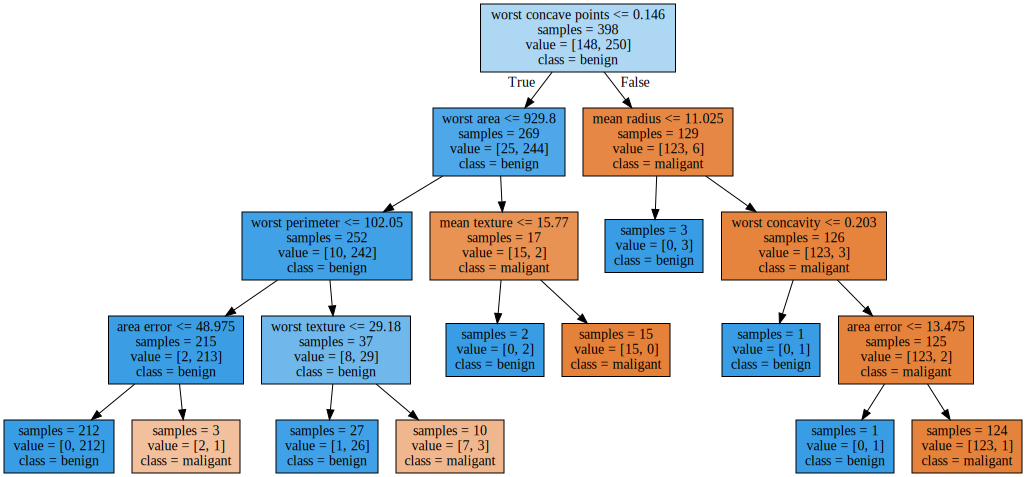

In [ ]:
# export_graphviz() = 그래프 저장용 텍스트 파일 포맷인 .dot 파일 포맷 생성

export_graphviz(DTL,      # Decision Tree model
                out_file = "decisionTree1.dot",         # 파일 저장 유무
                class_names = ["maligant", "benign"],   # class 변수의 값 이름 설정 / 이진분류에서 2개뿐
                feature_names = cancer.feature_names,   # columns 이름 지정
                impurity = False,       # 
                filled = True)          # True이면 노드의 클래스가 구분되도록 색 지정


import graphviz

with open("decisionTree1.dot") as f :
  dot_graph = f.read()
graphviz.Source(dot_graph)